The first section of the notebook creates a GUI with tkinter to aid in cleaning up the school names from saved pdf files. Abbreviations, unrecognized characters, and some elements of the finalist's name being incorrectly saved as part of the school name required this.

The second section does some analysis, ended with a conclusion that the majority of PMF finalists are coming from just a few schools

## Cleaning

In [1]:
from tkinter import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

This csv file is the the collection of copied rows from the pdfs the PMF office published of finalists from 2012-2017.

In [2]:
df=pd.read_csv("PMF_data170301.csv")

Displaying without the names of the finalists, the errors that will make it difficult to count the number of schools already show up in the first few rows:

In [3]:
df[['School', 'Type', 'Year']].head(5)

,School,Type,Year
0,DUKE UNIV ? SCHOOL OF PUBLIC SERVICE,PMF,2012.0
1,WEBSTER UNIVERSITY,PMF,2012.0
2,JOHNS HOPKINS UNIV SCH ADVAN INT ST,PMF,2012.0
3,UNIVERSITY OF SOUTHERN CALIFORNIA,PMF,2012.0
4,UNIVERSITY OF PITTSBURGH?MAIN,PMF,2012.0


A School column is duplicated and this new column will be semi-manually cleaned. If errors ever occur, it will be useful to have the original data still on hand. Additionally, if this notebook is used for 2018 finalists, having a key of raw school names to cleaned school names (e.g. "JOHNS HOPKINS UNIV SCH ADVAN INT ST" to "JOHNS HOPKINS UNIVERSITY") will make the cleaning process faster and easier

In [4]:
df['School2']=df['School']
df[['School', 'Type', 'Year','School2']].head(5)

,School,Type,Year,School2
0,DUKE UNIV ? SCHOOL OF PUBLIC SERVICE,PMF,2012.0,DUKE UNIV ? SCHOOL OF PUBLIC SERVICE
1,WEBSTER UNIVERSITY,PMF,2012.0,WEBSTER UNIVERSITY
2,JOHNS HOPKINS UNIV SCH ADVAN INT ST,PMF,2012.0,JOHNS HOPKINS UNIV SCH ADVAN INT ST
3,UNIVERSITY OF SOUTHERN CALIFORNIA,PMF,2012.0,UNIVERSITY OF SOUTHERN CALIFORNIA
4,UNIVERSITY OF PITTSBURGH?MAIN,PMF,2012.0,UNIVERSITY OF PITTSBURGH?MAIN


Using the GUI to clean the school names is still time consuming, so I didn't do it all in one go. Instead, I would clean a batch of school names, save the partially cleaned data, and then be able to return to it later. In that situation, I didn't load the above csv. Instead, I would use the one below.

In [ ]:
#df=pd.read_csv("PMF_data170301Tkinter.csv")

The GUI 'guesses' a word to group by using the most common word. Some words are far too common, so I don't want the script to use them:

In [5]:
not_kw_list=['UNIVERSITY','UNIV','COLLEGE','OF','AND','&','-','THE']

This block of code launches the semi-automatic GUI to help in cleaning School2 column

In [11]:
#pre-bins the values in School2 column if they are exact matches, and sorts for most common at top.
#n: where in that sorted list to start displaying school names (0==most common name, 9==10th most common, etc)
#m: number of school names to display. Useful for doing batches of schools.
def sorted_sublist(df, n, m):
    sublist=list(df['School2'].value_counts()[n:n+m].index)
    return sublist
#Once a school name is selected, this def looks for any other names in School2 that have the same key_word
#All names in School2 with the keyword are then returned
def search_term(df,key_word):
    collection=df[df.loc[:,'School2'].str.contains(key_word)].loc[:,'School2'].value_counts().index.tolist()
    return collection
#Allows the changing of which set of names from School2 to be displayed
def change_values():
    n=IntVar(root,value=e1.get())
    m=IntVar(root,value=e2.get())
    lb.delete(0, END)
    for item in sorted_sublist(df, n.get(),m.get()):
        lb.insert(END, item)
#Using the keyword and the list from above def search_term
#this makes a list of all schools with keyword in the GUI
def key_search():
    key_word=e4.get()
    lb2.delete(0,END)
    for item in search_term(df,key_word):
        lb2.insert(END,item)
#Once a school is selected, this code does several things:
#1. Sets the 'Selected' text in GUI
#2. 'Guesses' keyword as first word in name not in the not_kw_list
#3. Uses above def search_term and def key_search to 
#   find other similar namesin School2 and display them
#4. 'Guesses' the name to group entries under as selected name
def selected():
    select=lb.get(lb.curselection())
    sel.set(select)
    keyword_list=[];
    for word in select.split(' '):
        if word not in not_kw_list:
            keyword_list.append(word)
    kw.set(keyword_list[0])
    rn.set(select)
    key_search()
#Because School2 entries are all in caps, this makes typing caps automatic
def caps(event):
    kw.set(kw.get().upper())
def caps2(event):
    rn.set(rn.get().upper())
#Lets different names in School2 to be grouped together
#new name is in GUI as "Institution name"
def combine():
    test=[];
    duplicates=lb2.curselection()
    duplicates=list(duplicates)
    col=search_term(df,e4.get())
    for elm in duplicates:
        test.append(col[elm])
    #print(test)
    for elm in test:
        df.loc[df.loc[:,'School2']==elm,'School2']=e5.get()
    key_search()
    
root = Tk()
#first stage
n=IntVar(root,value=0)
m=IntVar(root,value=10)
Label(root, text="Start location").grid(row=0)
Label(root, text="Sublist length").grid(row=1)
e1 = Entry(root,textvariable=n)
e1.grid(row=0, column=1)
e2 = Entry(root,textvariable=m)
e2.grid(row=1, column=1)
bS=Button(root,text='Show',command=change_values).grid(row=2,column=0)
bSel=Button(root,text='Select',command=selected).grid(row=2,column=1)
lb = Listbox(root,selectmode=SINGLE,width=70, height=10)
for item in sorted_sublist(df, n.get(),m.get()):
    lb.insert(END, item)
lb.grid(row=3,column=0, columnspan=2)

#next stage
Label(root,text='Selected').grid(row=4)
Label(root,text='Keyword').grid(row=5)
sel=StringVar()
e3=Entry(root,width=50,textvariable=sel)
e3.grid(row=4,column=1)
kw=StringVar()
e4=Entry(root,width=50,textvariable=kw)
e4.grid(row=5,column=1)
e4.bind('<KeyRelease>',caps)
Button(root,text='Enter',command=key_search).grid(row=6,column=1)
lb2=Listbox(root,selectmode=MULTIPLE,width=50, height=10)
for item in search_term(df,'YALE'):
    lb2.insert(END, item)
lb2.grid(row=7,column=0, columnspan=2)
Label(root,text='Institution name').grid(row=8)
rn=StringVar()
e5=Entry(root,width=50,textvariable=rn)
e5.grid(row=8,column=1)
e5.bind('<KeyRelease>',caps2)
Button(root,text='Rename', command=combine).grid(row=9,column=1)
mainloop()

A brief example of how this cleaning worked:

In [74]:
df[['School', 'Type', 'Year','School2']].head(5)

,School,Type,Year,School2
0,DUKE UNIV ? SCHOOL OF PUBLIC SERVICE,PMF,2012.0,DUKE UNIVERSITY
1,WEBSTER UNIVERSITY,PMF,2012.0,WEBSTER UNIVERSITY
2,JOHNS HOPKINS UNIV SCH ADVAN INT ST,PMF,2012.0,JOHNS HOPKINS UNIVERSITY
3,UNIVERSITY OF SOUTHERN CALIFORNIA,PMF,2012.0,UNIVERSITY OF SOUTHERN CALIFORNIA
4,UNIVERSITY OF PITTSBURGH?MAIN,PMF,2012.0,UNIVERSITY OF PITTSBURGH


Results are saved in a csv file and can be returned to at a later date:

In [ ]:
#df.to_csv('PMF_data170301Tkinter.csv',index=False)

In total, there are 

In [25]:
print('There are %s Finalists represented in this csv file'%len(df))
print('There are %s Schools represented in this csv file'%len(df['School2'].value_counts()))
print('There are %s Schools represented in this csv file with at least 2 Finalists from 2012-2017'%len(df['School2'].value_counts()[df['School2'].value_counts()>1]))

There are 3473 Finalists represented in this csv file
There are 453 Schools represented in this csv file
There are 275 Schools represented in this csv file with at least 2 Finalists from 2012-2017


Finally, I can save this data in a csv file for upload to github:

In [31]:
#df[['Year','Type','School','School2']].to_csv('PMF_Yearly_Finalists_Github.csv',index=False)

# Analysis

In addition to the school names, the pdfs of the Finalists listed the number of applicants and the number of finalists selected for each year. That information is put into a simple dataframe below to look at trends in number of applications and selected finalists.

Saved as csv file for upload to GitHub

In [2]:
PMF_Total=[9100,12120,7000,7800,6050,6370];
PMF_Finalists=[628,663,518,508,455,417];
PMF_FinalistsSTEM=[0,0,91,92,97,0];
PMF_Years=[2012,2013,2014,2015,2016,2017];

FinalistsTotal=[];
for x in range(0,len(PMF_Finalists)):
    FinalistsTotal.append(PMF_Finalists[x]+PMF_FinalistsSTEM[x])
Percents=[];
for x in range(0,len(FinalistsTotal)):
    Percents.append(FinalistsTotal[x]/PMF_Total[x])
    
yearlyData=pd.DataFrame()
yearlyData["PMF_Years"]=PMF_Years;
yearlyData["PMF_Total"]=PMF_Total;
yearlyData["PMF_Finalists"]=PMF_Finalists;
yearlyData["PMF_FinalistsSTEM"]=PMF_FinalistsSTEM;
yearlyData["FinalistsTotal"]=FinalistsTotal;
yearlyData["Percents"]=Percents;
yearlyData.to_csv('YearlyApplicationData.csv',index=False)
yearlyData

,PMF_Years,PMF_Total,PMF_Finalists,PMF_FinalistsSTEM,FinalistsTotal,Percents
0,2012,9100,628,0,628,0.069011
1,2013,12120,663,0,663,0.054703
2,2014,7000,518,91,609,0.087000
3,2015,7800,508,92,600,0.076923
4,2016,6050,455,97,552,0.091240
5,2017,6370,417,0,417,0.065463


And can do a few plots with the admission data:

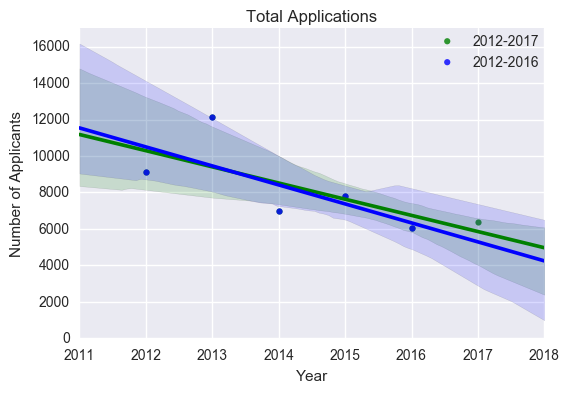

In [3]:
sns.regplot(x='PMF_Years',y='PMF_Total',data=yearlyData, fit_reg=True, ci=90, color='green',label='2012-2017');
sns.regplot(x='PMF_Years',y='PMF_Total',data=yearlyData.loc[~(
            yearlyData.loc[:,'PMF_Years']==2017),:], fit_reg=True,ci=90,color='blue',label='2012-2016')
plt.ticklabel_format(useOffset=False, style='plain');
plt.xlabel('Year');
plt.ylabel('Number of Applicants');
plt.title('Total Applications');
plt.xlim(2011,2018);
plt.ylim(0,17000);
plt.legend(bbox_to_anchor=(1., 1),loc=1,borderaxespad=0.);
plt.savefig('PMF_Total_Applications',bbox_inches='tight') 

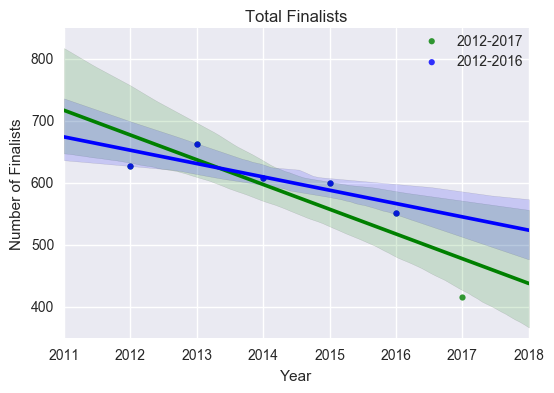

In [4]:
sns.regplot(x='PMF_Years',y='FinalistsTotal',data=yearlyData, fit_reg=True, ci=90,color='green',label='2012-2017');
sns.regplot(x='PMF_Years',y='FinalistsTotal',data=yearlyData.loc[~(
            yearlyData.loc[:,'PMF_Years']==2017),:], fit_reg=True,ci=90,color='blue',label='2012-2016')
plt.ticklabel_format(useOffset=False, style='plain');
plt.xlabel('Year');
plt.ylabel('Number of Finalists');
plt.title('Total Finalists');
plt.xlim(2011,2018);
plt.ylim(350,850);
plt.legend(bbox_to_anchor=(1., 1),loc=1,borderaxespad=0.);
plt.savefig('PMF_Total_Finalists',bbox_inches='tight') 

Now using the school data, I can look trends in the percent of finalists coming from the top schools that produce the most finalists per year.

In [5]:
df=pd.read_csv('PMF_data170301Tkinter.csv')

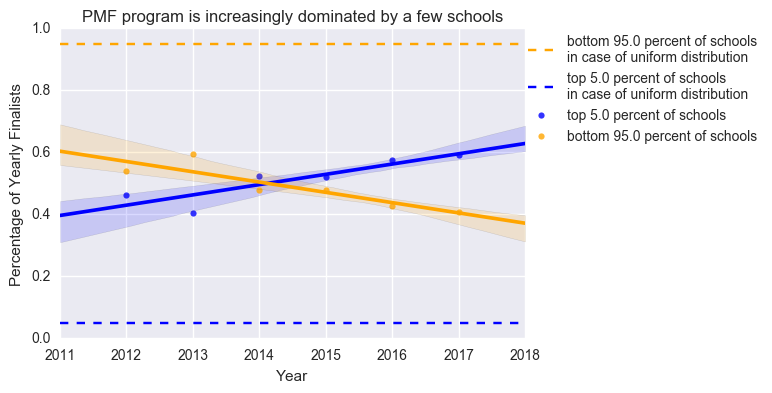

In [7]:
topPer=.05 #percent to seperate top from bottom in set of all schools

yearlyData['TopPer']=0
for year in [2012,2013,2014,2015,2016,2017]:
    a=df.loc[(df.loc[:,'Year']==year),'School2'].value_counts().index;
    b=round(len(df.loc[:,'School2'].unique())*topPer+.5); #trying to include schools that don't have a PMF Finalist some years.
    TopList=a[0:b];
    #print(len(TopList))
    a=len(df.loc[(df.loc[:,'School2'].isin(TopList))&(df.loc[:,'Year']==year),:])/(
        yearlyData.loc[yearlyData.loc[:,'PMF_Years']==year,'FinalistsTotal'].values[0])
    yearlyData.loc[yearlyData.loc[:,'PMF_Years']==year,'TopPer']=a
    
yearlyData['BotPer']=1-yearlyData['TopPer']

#sns.regplot(x='PMF_Years',y='TopPer',data=yearlyData,color='green',
#            fit_reg=False,ci=90,label='top %s percent 2017'%(topPer*100));
#sns.regplot(x='PMF_Years',y='BotPer',data=yearlyData,color='red',
#            fit_reg=False,ci=90,label='bottom %s percent 2017'%((1-topPer)*100));
sns.regplot(x='PMF_Years',y='TopPer',data=yearlyData.loc[~(
            yearlyData.loc[:,'PMF_Years']==2018),:],color='blue',ci=90,label='top %s percent of schools'%(topPer*100));
sns.regplot(x='PMF_Years',y='BotPer',data=yearlyData.loc[~(
            yearlyData.loc[:,'PMF_Years']==2018),:],color='orange',ci=90,label='bottom %s percent of schools'%((1-topPer)*100));
plt.xlim(2011,2018);
plt.axhline(1-topPer,color='orange',linestyle='--',label='bottom %s percent of schools\nin case of uniform distribution'%((1-topPer)*100));
plt.axhline(topPer,color='blue',linestyle='--',label='top %s percent of schools\nin case of uniform distribution'%(topPer*100));
plt.axis([2011,2018,0.,1.])
plt.title('PMF program is increasingly dominated by a few schools');
plt.ylabel('Percentage of Yearly Finalists');
plt.xlabel('Year');
#plt.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ticklabel_format(useOffset=False)
plt.legend(bbox_to_anchor=(1.51, 1.),loc=1,borderaxespad=0.);
#plt.savefig('PMF_Finalists_TopPercent',bbox_inches='tight') 

That method may not be best, a better choice will be to look at a subset of top performing schools and see how their percentage changes over time.

Here, I can look at the a window of schools. For example, the top 10 would be m=0 and n=10. Let me look at the top 25:

In [8]:
m=0
n=25;
TopList=df.School2.value_counts().index[m:n];
yearlyData['Top%sSchools'%n]=0
yearlyData['BotSchools_%s'%(n)]=0
for year in [2012,2013,2014,2015,2016,2017]:
    a=len(df.loc[(df.loc[:,'School2'].isin(TopList))&(df.loc[:,'Year']==year),:])
    yearlyData.loc[yearlyData.loc[:,'PMF_Years']==year,'Top%sSchools'%n]=a 
yearlyData['BotSchools_%s'%(n)]=yearlyData['FinalistsTotal']-yearlyData['Top%sSchools'%n]
yearlyDatav2=yearlyData[['PMF_Years','FinalistsTotal','Top%sSchools'%n,'BotSchools_%s'%n,]].copy()
yearlyDatav2['ratioTopBot']=round(yearlyDatav2['Top%sSchools'%n]/yearlyDatav2['BotSchools_%s'%n]*100,1)
yearlyDatav2['ratioTopTot']=round(yearlyDatav2['Top%sSchools'%n]/yearlyDatav2['FinalistsTotal']*100,1)
yearlyDatav2['ratioBotTot']=round(yearlyDatav2['BotSchools_%s'%n]/yearlyDatav2['FinalistsTotal']*100,1)
yearlyDatav2

,PMF_Years,FinalistsTotal,Top25Schools,BotSchools_25,ratioTopBot,ratioTopTot,ratioBotTot
0,2012,628,275,353,77.9,43.8,56.2
1,2013,663,248,415,59.8,37.4,62.6
2,2014,609,313,296,105.7,51.4,48.6
3,2015,600,309,291,106.2,51.5,48.5
4,2016,552,312,240,130.0,56.5,43.5
5,2017,417,241,176,136.9,57.8,42.2


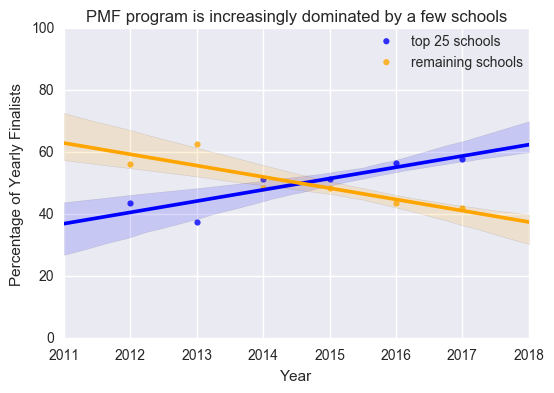

In [10]:
sns.regplot(x='PMF_Years',y='ratioTopTot',data=yearlyDatav2.loc[~(
            yearlyData.loc[:,'PMF_Years']==2018),:],color='blue',ci=90,label='top %s schools'%(n));
sns.regplot(x='PMF_Years',y='ratioBotTot',data=yearlyDatav2.loc[~(
            yearlyData.loc[:,'PMF_Years']==2018),:],color='orange',ci=90,label='remaining schools');
plt.xlim(2011,2018);
plt.axis([2011,2018,0.,100.])
plt.title('PMF program is increasingly dominated by a few schools');
plt.ylabel('Percentage of Yearly Finalists');
plt.xlabel('Year');
plt.ticklabel_format(useOffset=False)
plt.legend(bbox_to_anchor=(1., 1.),loc=1,borderaxespad=0.);
plt.savefig('PMF_Finalists_Top%s'%(n),bbox_inches='tight') 

There still might be questions on if the change in the number of finalists is the main culprit of this trend. To address that, let me make up some fake data. I will take the distribution of schools from 1 year and randomly select from that distribution enough finalists to match the real number of finalists every year.

In [17]:
n=25
df2=df.loc[df.loc[:,'Year']==2012,['Year','School2']]
sampleSize={2013:667,2014:609,2015:600,2016:552,2017:417}
for year in [2013,2014,2015,2016,2017]:
    N=sampleSize[year]
    df2=df2.append(df.loc[df.loc[:,'Year']==2012,['School2']].sample(N,replace=True))
    df2.fillna(year,inplace=True)
    #yearlyData.loc[yearlyData.loc[:,'PMF_Years']==year,'FinalistsTotal_sample%s'%N]
TopList=df.School2.value_counts().index[0:n];
yearlyData['Top%sSchools'%n]=0
yearlyData['BotSchools_%s'%(n)]=0
for year in [2012,2013,2014,2015,2016,2017]:
    a=len(df2.loc[(df2.loc[:,'School2'].isin(TopList))&(df2.loc[:,'Year']==year),:])
    yearlyData.loc[yearlyData.loc[:,'PMF_Years']==year,'Top%sSchools'%n]=a
yearlyData['BotSchools_%s'%(n)]=yearlyData['FinalistsTotal']-yearlyData['Top%sSchools'%n]
yearlyDatav2=yearlyData[['PMF_Years','FinalistsTotal','Top%sSchools'%n,'BotSchools_%s'%n,]].copy()
yearlyDatav2['ratioTopBot']=yearlyDatav2['Top%sSchools'%n]/yearlyDatav2['BotSchools_%s'%n]
yearlyDatav2['ratioTopTot']=yearlyDatav2['Top%sSchools'%n]/yearlyDatav2['FinalistsTotal']
yearlyDatav2['ratioBotTot']=yearlyDatav2['BotSchools_%s'%n]/yearlyDatav2['FinalistsTotal']
yearlyDatav2

,PMF_Years,FinalistsTotal,Top25Schools,BotSchools_25,ratioTopBot,ratioTopTot,ratioBotTot
0,2012,628,275,353,0.779037,0.437898,0.562102
1,2013,663,269,394,0.682741,0.405732,0.594268
2,2014,609,271,338,0.801775,0.444992,0.555008
3,2015,600,241,359,0.671309,0.401667,0.598333
4,2016,552,228,324,0.703704,0.413043,0.586957
5,2017,417,173,244,0.709016,0.414868,0.585132


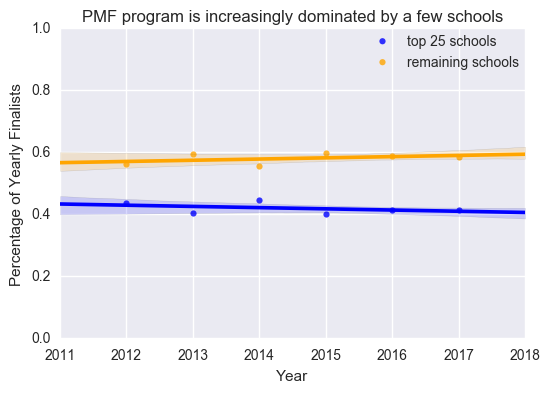

In [18]:
sns.regplot(x='PMF_Years',y='ratioTopTot',data=yearlyDatav2.loc[~(
            yearlyData.loc[:,'PMF_Years']==2018),:],color='blue',ci=90,label='top %s schools'%(n));
sns.regplot(x='PMF_Years',y='ratioBotTot',data=yearlyDatav2.loc[~(
            yearlyData.loc[:,'PMF_Years']==2018),:],color='orange',ci=90,label='remaining schools');
plt.xlim(2011,2018);
plt.axis([2011,2018,0.,1.])
plt.title('PMF program is increasingly dominated by a few schools');
plt.ylabel('Percentage of Yearly Finalists');
plt.xlabel('Year');
plt.ticklabel_format(useOffset=False)
plt.legend(bbox_to_anchor=(1., 1.),loc=1,borderaxespad=0.);
#plt.savefig('PMF_Finalists_TopPercent',bbox_inches='tight') 

So, if the distribution had the same shape each year, we would expect roughly equal percent of students from the top 25 schools. That is not the case. Their share is increasing.

The number of Finalists admitted dropped, on average, over the years. But that's not true for the top schools.

We can see this one final way, but just looking at the raw admission numbers for the top 25 schools and the rest. The top 25 have seen their number of Finalists stay fairly constant, while the rest of the schools have seen a large drop.

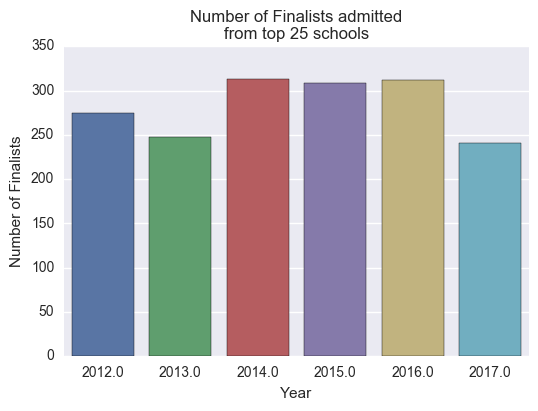

In [19]:
n=25
pipelines=df.loc[:,'School2'].value_counts().index[0:n]
sns.countplot(x='Year',data=df.loc[df.loc[:,'School2'].isin(pipelines),:])
plt.title('Number of Finalists admitted\nfrom top %s schools'%(n))
plt.ylabel('Number of Finalists');
plt.xlabel('Year');

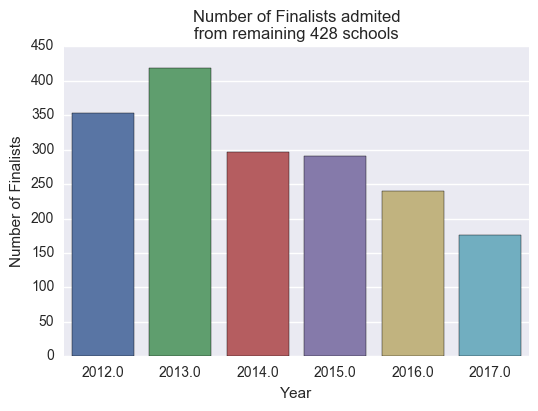

In [20]:
sns.countplot(x='Year',data=df.loc[~df.loc[:,'School2'].isin(pipelines),:])
plt.title('Number of Finalists admited\nfrom remaining %s schools'%(453-n))
plt.ylabel('Number of Finalists');
plt.xlabel('Year');

Above it looks like the top schools are increasingly dominating the PMF finalist list. But I would feel more sure of that claim if there was some quantifiable way of measuring that. I'll use a Kullback-Leibler divergence test to do that

The larger the number, the bigger the divergence between the 2 prob distributions. Comparing a collection of models (P) to the real distribution (Q), the closest fit is a neg. exponential:

In [5]:
def KL(P,Q):
    D=0
    for x in range(0,len(b)):
        D=D+np.nan_to_num(P[x]*np.log(P[x]/Q[x]))
    return D
a=df.loc[:,'School2'].value_counts().values
Q=a/sum(a)
label='uniform'
b=np.ones(len(a));
bsum=sum(b)
P_uniform=[elm/bsum for elm in b];
print('%s: %s'%(label,KL(P_uniform, Q)))
label='linear'
b=range(1,len(a)+1);
b=[len(a)-elm-35 for elm in b];
bsum=sum(b);
P_linear=[elm/bsum for elm in b];
print('%s: %s'%(label,KL(P_linear, Q)))
label='power'
b=range(1,len(a)+1);
b=[elm**-.9 for elm in b]
bsum=sum(b);
P_power=[elm/bsum for elm in b];
print('%s: %s'%(label,KL(P_power, Q)))
label='neg power exp'
b=range(1,len(a)+1)
b=[np.exp(-elm**.314) for elm in b]
bsum=sum(b);
P_negexp=[elm/bsum for elm in b];
print('%s: %s'%(label,KL(P_negexp, Q)))

uniform: 0.961379051389
linear: 0.516397951951
power: 0.0595205903155
neg power exp: 0.0149541393559


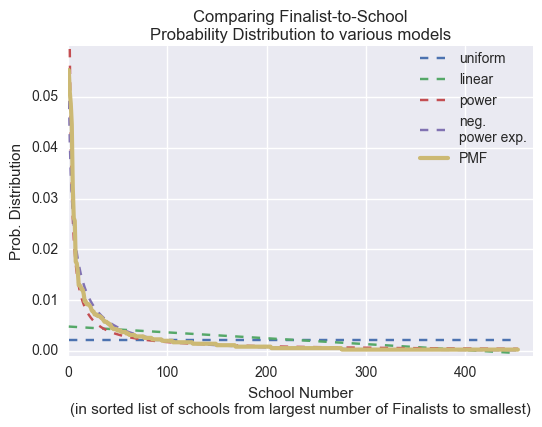

In [8]:
plt.plot(range(1,len(Q)+1),P_uniform,label='uniform',linestyle='--')
plt.plot(range(1,len(Q)+1),P_linear,label='linear',linestyle='--')
plt.plot(range(1,len(Q)+1),P_power,label='power',linestyle='--')
plt.plot(range(1,len(Q)+1),P_negexp,label='neg.\npower exp.',linestyle='--')
plt.plot(range(1,len(Q)+1),Q,label='PMF',linewidth=3)
plt.axis([0,468,-0.001,.06]);
plt.legend(bbox_to_anchor=(1., 1.),loc=1,borderaxespad=0.);
plt.xlabel('School Number\n(in sorted list of schools from largest number of Finalists to smallest)');
plt.ylabel('Prob. Distribution');
plt.title('Comparing Finalist-to-School\nProbability Distribution to various models');
plt.savefig('FtS_vs_models_linear',bbox_inches='tight') 

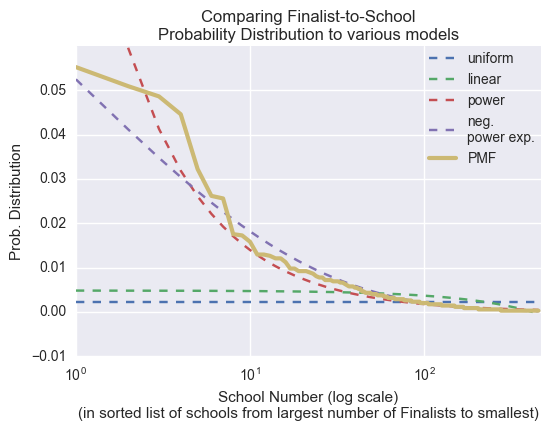

In [9]:
plt.semilogx(range(1,len(Q)+1),P_uniform,label='uniform',linestyle='--')
plt.semilogx(range(1,len(Q)+1),P_linear,label='linear',linestyle='--')
plt.semilogx(range(1,len(Q)+1),P_power,label='power',linestyle='--')
plt.semilogx(range(1,len(Q)+1),P_negexp,label='neg.\npower exp.',linestyle='--')
plt.semilogx(range(1,len(Q)+1),Q,label='PMF',linewidth=3)
plt.axis([0,468,-0.01,.06]);
plt.legend(bbox_to_anchor=(1., 1.),loc=1,borderaxespad=0.);
plt.xlabel('School Number (log scale)\n(in sorted list of schools from largest number of Finalists to smallest)');
plt.ylabel('Prob. Distribution');
plt.title('Comparing Finalist-to-School\nProbability Distribution to various models');
plt.savefig('FtS_vs_models_semilogx',bbox_inches='tight') 

Now I'll flip the defns of P and Q in the K-L divergence to compare each year's distribution (P) to a uniform distribution (Q). 

In [80]:
Pvals=[];
for year in df.Year.unique():
    a=df.loc[df.loc[:,'Year']==year,'School2'].value_counts().values
    b=len(df.loc[df.loc[:,'Year']==year,'School2'].unique())
    a=list(a)+list(np.zeros(453-b)) #including schools in the dataset with 0 Finalists
    #a=list(a)
    P=a/sum(a)
    Pvals.append(P)
    aSum=sum(a)
    aLen=len(a)
    aUni=aSum/aLen
    Q=aUni/sum(a)
    D=sum(np.nan_to_num([elm*np.log(elm/Q) for elm in P]))
    print('%s: %s'%(year,D))

2012.0: 1.35923496155
2013.0: 1.10516077683
2014.0: 1.5389142903
2015.0: 1.53140511738
2016.0: 1.68377150167
2017.0: 1.81873958783


The general trend towards higher numbers lends support to the idea that the real distribution is getting farther away from uniform over time.

That's also apparent by just looking at each year's distribution:

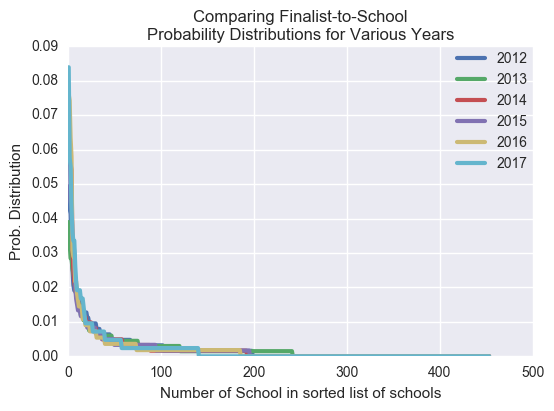

In [84]:
for x in range(0,len(Pvals)):
    plt.plot(range(1,len(Pvals[x])+1),Pvals[x],label=2012+x,linewidth=3)
    plt.legend(bbox_to_anchor=(1., 1.),loc=1,borderaxespad=0.);
    plt.xlabel('Number of School in sorted list of schools');
    plt.ylabel('Prob. Distribution');
    plt.title('Comparing Finalist-to-School\nProbability Distributions for Various Years');
plt.savefig('FtS_per_year_linear',bbox_inches='tight') 

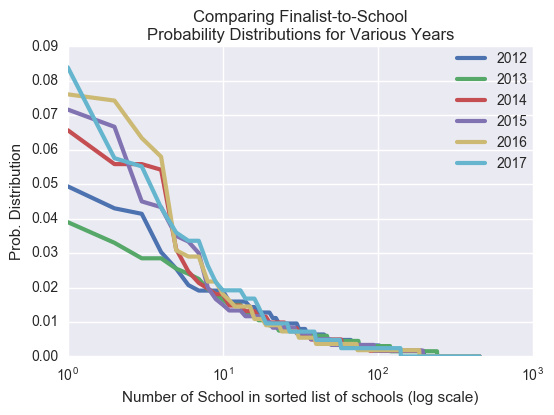

In [81]:
for x in range(0,len(Pvals)):
    plt.semilogx(range(1,len(Pvals[x])+1),Pvals[x],label=2012+x,linewidth=3)
    plt.legend(bbox_to_anchor=(1., 1.),loc=1,borderaxespad=0.);
    #plt.legend(bbox_to_anchor=(1., 1.),loc=1,borderaxespad=0.);
    plt.xlabel('Number of School in sorted list of schools (log scale)');
    plt.ylabel('Prob. Distribution');
    plt.title('Comparing Finalist-to-School\nProbability Distributions for Various Years');
plt.savefig('FtS_per_year_semilogx',bbox_inches='tight') 

I was able to record a bit of information on application rates during the 2017 application window. The PMF office updated the appliation window a few times near closing time, stating how many applications had been started/finished. That information is placed here:

In [21]:
RT_PMF=pd.DataFrame()
RT_PMF['Hours to Deadline']=[336,24+6,24-12.17,24-21.25,24-22.5,0];
RT_PMF['Started Applications']=[0,6500,7300,8000,8000,8000];
RT_PMF['Completed Applications']=[0,2600,3600,5100,5600,6370];
RT_PMF['Percent Completed']=RT_PMF['Completed Applications']/RT_PMF['Started Applications']
RT_PMF['Percent Completed'].fillna(0,inplace=True)
RT_PMF.to_csv('ApplicationWindow2017.csv',index=False)
RT_PMF

,Hours to Deadline,Started Applications,Completed Applications,Percent Completed
0,336.00,0,0,0.000000
1,30.00,6500,2600,0.400000
2,11.83,7300,3600,0.493151
3,2.75,8000,5100,0.637500
4,1.50,8000,5600,0.700000
5,0.00,8000,6370,0.796250


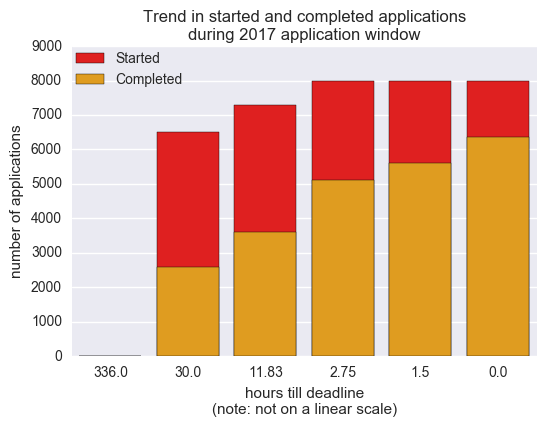

In [23]:
x1=sns.barplot(x='Hours to Deadline',y='Started Applications',data=RT_PMF, color='red',label='Started')
x2=sns.barplot(x='Hours to Deadline',y='Completed Applications',data=RT_PMF, color='orange',label='Completed')
plt.title('Trend in started and completed applications\nduring 2017 application window');
x1.invert_xaxis();
plt.xlabel('hours till deadline\n(note: not on a linear scale)');
plt.ylabel('number of applications');
plt.legend(bbox_to_anchor=(0.25, 1),loc=1,borderaxespad=0.);
x1.yaxis.set_ticks(np.arange(0.,10000, 1000));
plt.savefig('ApplicationWindow2017',bbox_inches='tight') 